# Closing Incidents 

### Business Problem:

Lets assume you're working as Manager in reputed Organization. And you've two reportees reporting everyday such that status of Incidents they worked on. As a Manager you analyze the incidents they were closed for all request under your guidance.


**Scenario:**

Person A has a success rate of 0.69 for a Single Incident and on an average you were assigned 10 tickets.

Person B has a success rate of 0.83 for a Single Incident and on an average you were assigned 16 tickets.


**Question**

You want to know what is the probability of each person clearing 6 Incidents? 

`Note`:

    Obviously by noticing question itself you might got, probability of person B is more than person A and Number of assigned tickets are also higher. But you should know how determinate of your results will be.

Solutions:
--------------

*__Notable Characteristics__*
        
1. The process consists of sequence. In layman terms you'll pick tickets one after another


2. For Each ticket you either closed it ot not. In statistical lingo might say, Each trial there are two possible outcomes either you'll close the incident (success) or not (failure). 



3. Probability of closing one incident represent as *__p__* and probability of not closing incident represent as *__q__*. Probability of clearing ticket will not change from incident from incident *__p__* and *__q__* are fixed 


4. Closing of one ticket will not affect/influence other ticket. One ticket might be in one domain e.g) prod, other might be in differ domain e.g) non-prod


*success and failure may be counter intitutive here

`explanation`:

Law of probabiltiy from high school math,

1. 0<= P(event) <= 1

2. Sum of all  probability = 1

probabilty of closing ticket     = *__p__* 

probabilty of not closing ticket = **1 - *__p__***



Another interesting thing is either success or failure in each ticket(trial). Similar to fair coin toss you may get either Head or Tail. 

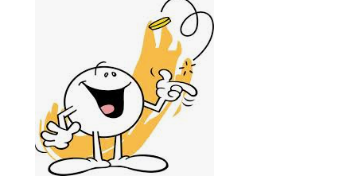


Both event not occurs in same time aka **Mutually Exclusive Event**. Here We say trial is **Bernouli Trial**

We are Interested in Number of successes(closing incidents) in our trials. and each trials are Bernouli trails

This kind of distribution we call,

**__Binomial Distribution__**
=====

---

### DETOUR SOME MATHS

let's say 5 trials are happening. possibilities are,

| # success     | # failures    | 
| ------------- |:-------------:| 
| 0             | 5             | 
| 1             | 4             | 
| 2             | 3             | 
| 3             | 2             | 
| 4             | 1             | 
| 5             | 0             | 

now i'm interested in what are the ways 4 success and 1 failure happens. 
**Probability is nothing but count in complex ways**

possibilities are,

| trial   | 1 | 2 | 3 | 4 | 5 |
| ------- |---|---|---|---|---|
| outcome1| S | F | S | S | S |
| outcome2| S | S | S | F | S |
| outcome3| F | S | S | S | S |
| outcome4| S | S | S | S | F |
| outcome5| S | S | F | S | S |

if you check row-wise any one might fail out of 5, 4 will succes

we can say 5 events we interested in 4 events 5C<sub>4</sub>= 5


So,

| trial   | # success | # failure | combination | # of ways possibile |
| ------- |-----------|-----------|-------------|---------------------|
| 5| 0 | 5 | 5C<sub>0</sub> | 1 |
| 5| 1 | 4 | 5C<sub>1</sub> | 5 |
| 5| 2 | 3 | 5C<sub>2</sub> | 10 |
| 5| 3 | 2 | 5C<sub>3</sub> | 10 |
| 5| 4 | 1 | 5C<sub>4</sub> | 5 |
| 5| 5 | 0 | 5C<sub>5</sub> | 1 |


`Bonus Tip`:  if you notice combination follows **NORMAL distribution**. This is the place where statistics met Mathematics


assume, success has probability associate with 0.8. so my second table looks like,

| trial   | 1 | 2 | 3 | 4 | 5 | Probability |
| ------- |---|---|---|---|---|-------------|
| outcome1| 0.8 | 0.2 | 0.8 | 0.8 | 0.8 | 0.08192 |
| outcome2| 0.8 | 0.8 | 0.8 | 0.2 | 0.8 | 0.08192 |
| outcome3| 0.2 | 0.8 | 0.8 | 0.8 | 0.8 | 0.08192 |
| outcome4| 0.8 | 0.8 | 0.8 | 0.8 | 0.2 | 0.08192 |
| outcome5| 0.8 | 0.8 | 0.2 | 0.8 | 0.8 | 0.08192 |

if you add sum of probability here will not return 1. why because this is one of many ways.

In general, *p*<sup>x</sup> * *q*<sup>n-x</sup>


`Inference:`: The probability of any given outcome is combination of both number of trial and success rae


For total table,

| trial   | # success | # failure | combination | probability |
| ------- |-----------|-----------|-------------|---------------------|
| 5| 0 | 5 |  5C<sub>0</sub> * 0.8<sup>0</sup> * 0.2<sup>5</sup>  | 0.327 |
| 5| 1 | 4 |  5C<sub>0</sub> * 0.8<sup>1</sup> * 0.2<sup>4</sup>  | 0.4096 |
| 5| 2 | 3 |  5C<sub>0</sub> * 0.8<sup>2</sup> * 0.2<sup>3</sup>  | 0.2048 |
| 5| 3 | 2 |  5C<sub>0</sub> * 0.8<sup>3</sup> * 0.2<sup>2</sup>  | 0.0512 |
| 5| 4 | 1 |  5C<sub>0</sub> * 0.8<sup>4</sup> * 0.2<sup>1</sup>  | 0.0064 |
| 5| 5 | 0 |  5C<sub>0</sub> * 0.8<sup>5</sup> * 0.2<sup>0</sup>  | 0.00032|


In general, nC<sub>x</sub> *p*<sup>x</sup> * *q*<sup>n-x</sup>

`Inference:` If you sum of all probability we get 1

-----

Lets Come to our problem,  Since we have so many combination we relay on maths

Q: Person A
---
What's probability of Person A closing 6 incident if 10 were raised and probabiltiy associate with 0.69?

In [1]:
from scipy.stats import binom

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

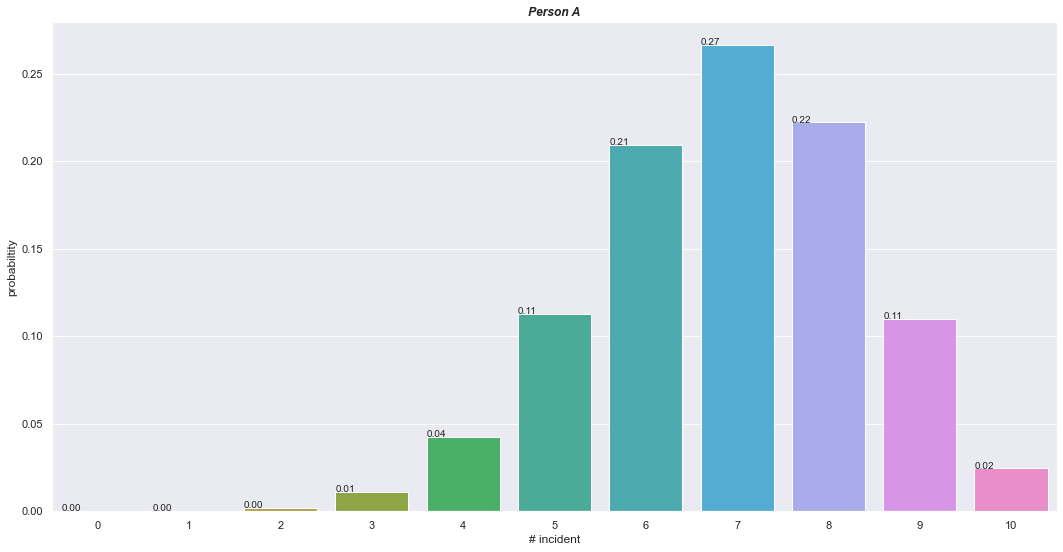

In [3]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x=np.arange(11),y=binom.pmf(np.arange(11),10,0.69))

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()))


plt.xlabel('# incident')
plt.ylabel('probabiltity')
plt.title('Person A',fontsize='large',fontstyle='oblique',fontweight='bold')
plt.show()

In [4]:
pd.DataFrame(
    data=[np.arange(11), binom.pmf(np.arange(11),10,0.69),np.cumsum(binom.pmf(np.arange(11),10,0.69))],
    index=['# of successful incident','probability associated','cumulative probability']
).T

,# of successful incident,probability associated,cumulative probability
0,0.0,0.000008,0.000008
1,1.0,0.000182,0.000191
2,2.0,0.001827,0.002018
3,3.0,0.010846,0.012864
4,4.0,0.042246,0.055110
5,5.0,0.112838,0.167947
6,6.0,0.209296,0.377243
7,7.0,0.266201,0.643444
8,8.0,0.222192,0.865637
9,9.0,0.109901,0.975538


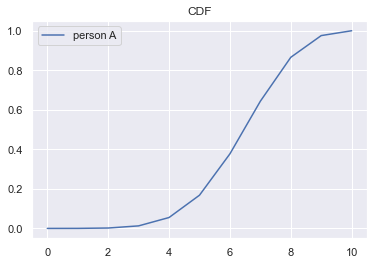

In [5]:
plt.plot(np.arange(11),np.cumsum(binom.pmf(np.arange(11),10,0.69)),label='person A')
plt.title('CDF')
plt.legend()
plt.show()

Q : Person B
--
What's probability of Person B closing 6 incident if 16 were raised and probabiltiy associate with 0.83?

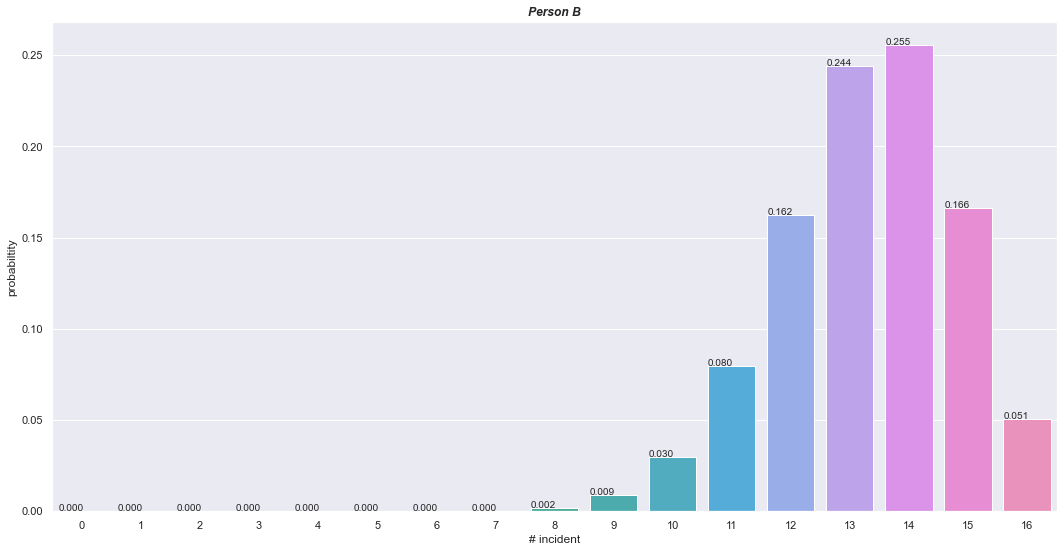

In [6]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x=np.arange(17),y=binom.pmf(np.arange(17),16,0.83))

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x(), p.get_height()))


plt.xlabel('# incident')
plt.ylabel('probabiltity')
plt.title('Person B',fontsize='large',fontstyle='oblique',fontweight='bold')
plt.show()

In [7]:
pd.DataFrame(
    data=[np.arange(17), binom.pmf(np.arange(17),16,0.83),np.cumsum(binom.pmf(np.arange(17),16,0.83)) ],
    index=['# of successful incident','probability associated','cumulative sum proba']
).T

,# of successful incident,probability associated,cumulative sum proba
0,0.0,4.866119e-13,4.866119e-13
1,1.0,3.801298e-11,3.849959e-11
2,2.0,1.391946e-09,1.430445e-09
3,3.0,3.171453e-08,3.314498e-08
4,4.0,5.032350e-07,5.363799e-07
5,5.0,5.896730e-06,6.433110e-06
6,6.0,5.278151e-05,5.921462e-05
7,7.0,3.681400e-04,4.273546e-04
8,8.0,2.022063e-03,2.449417e-03
9,9.0,8.775489e-03,1.122491e-02


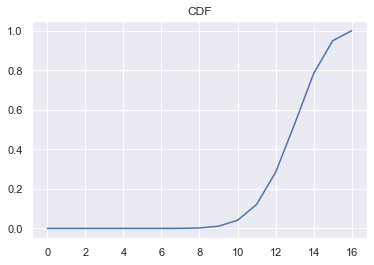

In [8]:
plt.plot(np.arange(17),np.cumsum(binom.pmf(np.arange(17),16,0.83)))
plt.title('CDF')
plt.show()

`CONCLUSION:`

for person A closing 6 incident=0.209296 > person B closing 6 incident=5.278151266567574e-05

for person A closing 10 incident=0.024462 < person B closing 10 incident=0.029991522742222936

for person A closing 10+ incident=0    < person B closing 10+ incident
(because atmost 10 incidents only assigned everyday for person A)


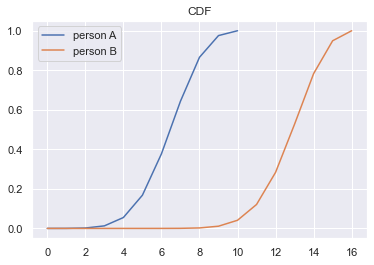

In [9]:
plt.plot(np.arange(11),np.cumsum(binom.pmf(np.arange(11),10,0.69)),label='person A')
plt.plot(np.arange(17),np.cumsum(binom.pmf(np.arange(17),16,0.83)),label='person B')
plt.title('CDF')
plt.legend()
plt.show()